# Lab 7 - Cubic Splines
## April 3 - April 5, 2023
## Student 1 Name: Dhruv Shah Student 1 ID No. $\underline{202103017}$
## Student 2 Name: Vatsal Shah Student 2 ID No. $\underline{202103022}$
## Student 3 Name: Pranav Patel Student 3 ID No. $\underline{202103040}$
## Date of Submission: $\underline{05/04/23}$
***

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 Write a function `myUL` that takes in a matrix  $A \in \mathbb{R}^{n \times n}$, and returns the permutation matrix $P$, upper triangular matrix $U$ and lower triangular matrix $L$ such that $PA = UL$. (*this is not a typo*)

In [2]:
### PA=UL factorization
def myUL(A):
  # print(A)
  n = len(A[0])
  U = np.eye(n)
  L = A.copy()
  P = np.eye(n)

  for i in range(n-1, 0, -1):
    E = np.eye(n) 

    # what if a_i,i = 0?
    for j in range(i, -1, -1):
      if (~np.isclose(L[j, j] , 0)):
        break
      L[[j-1, j], ] = L[[j, j-1], ]
      P[[j-1, j], ] = P[[j, j-1], ]
      
    m_ij = -L[ :i, i]/L[i, i]
    # print(L[i, i], 'pivot')
    # print(m_ij, 'mj')
    
    
    
    E[ :i, i] = m_ij
    # print(E)
    L = np.matmul(E, L)
    # print(L, 'L inter')
    U[ :i, i] = -m_ij
    # print(U)
  
  return P, U, L



### Q.1(a) Print examples of matrices A with matrices P,L and U such that PA = UL, with a verification for PA=UL.

In [3]:
### Examples of A and factors P,U,L.

# A = np.array([[1, 2, 3, 4], 
#               [1, 9, 4, 5], 
#               [5, 3, 5, 8], 
#               [3, 4, 2, 2]])
A = np.array([[1,2,3], 
              [4,5,6], 
              [7, 8, 9]])
# A = np.array([
#     [1, 2, 3, 4],
#     [5, 6, 7, 8],
#     [9, 10, 11, 12],
#     [13, 14, 15, 16],
# ])


P, U, L = myUL(A)
print("Verifying PA = UL")
print(np.matmul(P,A))
print(np.matmul(U,L))

Verifying PA = UL
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [4]:
A = np.array([[0, 2, 3, 4], [1, 0, 5, 6], [5, 2, 5, 1], [7, 4, 2, 0]])
P, U, L = myUL(A)
print("Verifying PA = UL")
print(np.matmul(P,A))
print(np.matmul(U,L))

Verifying PA = UL
[[0. 2. 3. 4.]
 [1. 0. 5. 6.]
 [7. 4. 2. 0.]
 [5. 2. 5. 1.]]
[[0. 2. 3. 4.]
 [1. 0. 5. 6.]
 [7. 4. 2. 0.]
 [5. 2. 5. 1.]]


***
### Q.2 Let us now use the above PA=UL factorization to compute inverse of a given matrix. Write a function `mymatinverse` that takes in a matrix $A \in \mathbb{R}^{n\times n}$ uses the above function to obtain the factorization: $PA = UL$, and find whether the matrix $A$ is invertible or not, and if it is, it should return the inverse computed by back/forward substitution.

In [102]:
def forsub(L, b):
    #Get number of rows
    n = L.shape[0]
    
    #Allocating space for the solution vector
    y = np.zeros_like(b, dtype=np.double);
    
    #Here we perform the forward-substitution.  
    #Initializing  with the first row.
    y[0] = b[0] / L[0, 0]
    
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]
    return y



def backsub(U, y):
    #Number of rows
    n = U.shape[0]
    
    #Allocating space for the solution vector
    x = np.zeros_like(y, dtype=np.double);

    #Here we perform the back-substitution.  
    #Initializing with the last row.
    x[-1] = y[-1] / U[-1, -1]
    
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]
        
    return x

In [103]:
### Compute Inverse of Matrix using UL decomposition and back/forward substitution
def mymatinverse(A):
  P, U, L = myUL(A)
  n = len(A[0])
  
  invA = np.zeros((n, n))

  I = np.eye(n)
  I = np.matmul(P, I)
  detL = np.prod(np.diagonal(L))
  if (detL == 0):
    print('Not Invertible')
    return
  
  for i in range(n):
    y = backsub(U, I[:,i])
    invA[:, i] = forsub(L, y)

  return invA

### Q.2(a) Print a few examples of matrices $A$ and their inverses, and verify the correctness of the inverse by computing $A\cdot A^{-1}$

In [104]:
### Examples of A and A^{-1}

A = np.array([[0, 2, 3, 4], [1, 0, 5, 6], [5, 2, 5., 1], [7, 4, 2, 0]])
invA = mymatinverse(A)
print(invA)
print(np.matmul(A, invA))
             





[[-0.27737226  0.20437956 -0.11678832  0.19708029]
 [ 0.4270073  -0.28832117  0.02189781  0.02554745]
 [ 0.11678832 -0.13868613  0.3649635  -0.24087591]
 [-0.05109489  0.24817518 -0.28467153  0.16788321]]
[[ 1.00000000e+00 -1.88737914e-15 -1.11022302e-15  1.33226763e-15]
 [-2.83106871e-15  1.00000000e+00 -1.11022302e-15  8.88178420e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [105]:
A = np.array([[1,2,3], 
              [4,5,6], 
              [7,8,8]])
invA = mymatinverse(A)
print(invA)
print(np.matmul(A, invA))


[[-2.66666667  2.66666667 -1.        ]
 [ 3.33333333 -4.33333333  2.        ]
 [-1.          2.         -1.        ]]
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-8.8817842e-16  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [106]:
A = np.array([[1, 2, 3, 4], [1, 3, 5, 6], [5, 2, 3, 1], [7, 4, 2, 1]])
invA = mymatinverse(A)
print(invA)
print(np.matmul(A, invA))

[[ 1.4  -0.96  0.28 -0.12]
 [-2.2   1.48 -0.64  0.56]
 [-1.6   1.04  0.28 -0.12]
 [ 2.2  -1.28  0.04 -0.16]]
[[ 1.00000000e+00  0.00000000e+00 -1.55431223e-15 -1.11022302e-15]
 [-3.55271368e-15  1.00000000e+00 -2.44249065e-15 -2.10942375e-15]
 [-4.44089210e-16  8.88178420e-16  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Q.3 Using the above function to compute inverse of a matrix, draw a closed cubic spline curve through points given by the user, as implemented in the previous lab.

In [107]:
def find_next_indexes(x, arr):
    next_smaller = None
    next_bigger = None
    for i in range(len(arr)):
        if arr[i] < x:
            if next_smaller is None or arr[i] > arr[next_smaller]:
                next_smaller = i
        elif arr[i] > x:
            if next_bigger is None or arr[i] <= arr[next_bigger]:
                next_bigger = i
    if next_smaller == None:
        next_smaller = 0
    
    return next_smaller, next_bigger

In [108]:
# Functions that Evaluate the S(x) = P(x)_i , where i=0, 1, 2, .., n-1
def S(val, coeff, data_points):
    k, k1 = find_next_indexes(val,data_points)
    poly = coeff[k,:] # some function that returns you the coefficients for the P(x)_i given x
    # poly = poly.reshape((4,1))
    eval = (poly[0] + (poly[1] * val) + (poly[2] * (val**2)) + (poly[3] * (val**3)))    
    return eval

In [113]:
### def mycubicsplineclosedcurve(x,y):

def mycubicsplineclosedcurve(x, y, n):
  matlar = np.zeros((4*n,4*n))
  # y_fin = np.zeros((4*n,1))
  y_fin = []
  for i in range(n):
      blockMat = []
      x_k = x[i]
      x_k1 = x[i+1]
      y_fin = np.append(y_fin, [y[i], y[i+1], 0, 0])

      r1 = np.array([1, x_k, x_k ** 2, x_k ** 3, 0, 0, 0,0]) # n x 8 
      r2 = np.array([1, x_k1, x_k1 ** 2, x_k1 ** 3, 0, 0, 0,0]) # n x 8
      if(i != n-1):
          r3 = np.array([0, 1, 2 * x_k1, 3 * (x_k1 ** 2), 0, -1, -2 * x_k1, -3 * (x_k1 ** 2) ]) # n-1 x 8 
          r4 = np.array([0, 0, 2, 6 * x_k1, 0, 0, -2, -6 * x_k1 ]) # n-1 x 8

          blockMat = np.vstack((r1, r2, r3, r4))
          matlar[4*i:4*i+4,4*i:4*i+8] = blockMat
      else :
          r1 = r1[:4]
          r2 = r2[:4]
          blockMat = np.vstack((r1, r2))
          matlar[4*i:4*i+2,4*i:4*i+4] = blockMat 

  matlar[4*n-2:4*n-1,0:4] = np.array([0, 1, 2 * x[0], 3*(x[0] **2)])
  matlar[4*n-2:4*n-1,4*n-4:4*n] = np.array([0, -1, -2 * x[len(x) - 1], -3*(x[len(x) - 1] **2)])

  
  matlar[4*n-1:4*n,0:4] = np.array([0, 0, 2, 6 * x[0] ])
  matlar[4*n-1:4*n,4*n-4:4*n] = np.array([0, 0, -2, -6* x[len(x) - 1] ])

  # print(matlar.shape)
  # print(matlar)

  y_fin = np.reshape(y_fin, (4*n,1))
  # print(y_fin)

  # M = np.linalg.inv(matlar)
  M = mymatinverse(matlar)
  # print(M)
  # print(np.linalg.inv(matlar))
  # print(abs(M - np.linalg.inv(matlar)))
  # y_fin = np.matmul(P, y_fin)
  coeff =  np.matmul(M, y_fin)
  # coeff = np.linalg.solve(matlar, y_fin)
  
  coeff_eval = np.reshape(coeff, (len(x) - 1,4))

  # x_plot = np.linspace(x[0], x[len(x)-1], 1000)
  # y_plot = []
  # plt.scatter(x,y)
  # for i in range(len(x_plot)):
  #     val = S(x_plot[i], coeff_eval, x)
  #     y_plot = np.append(y_plot, val)
  # plt.plot(x_plot, y_plot, color='b')
  # plt.show()

  return coeff_eval







### Q.3(a) Show some examples of closed spline curves passing through user given points.

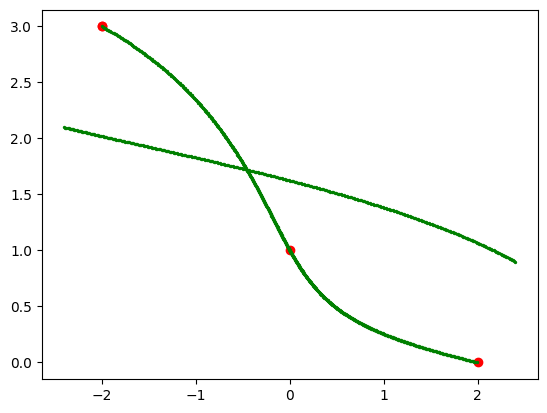

In [114]:
### Examples of splines
x = [-2, 2, 0, -2]
y = [3, 0, 1, 3]

n = len(x)
t = np.linspace(-1, 1, len(x))

plt.show()
vx = mycubicsplineclosedcurve(t, x, n-1)
vy = mycubicsplineclosedcurve(t, y, n-1)
vx = np.reshape(vx, (len(x) - 1, 4))
vy = np.reshape(vy, (len(x) - 1, 4))


t_x = np.linspace(-1, 1, 1000)
x_t = []
y_t = []

for i in range(len(t_x)):
  x_t = np.append(x_t, S(t_x[i], vx, t))
  y_t = np.append(y_t, S(t_x[i], vy, t))

plt.scatter(x, y, color='r')
plt.scatter(x_t, y_t, s=2, color='g')
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)


Due to the computational errors obtained in computing the inverse using the function mymatinverse(A), we do not get an exact closed curve. To reduce this errors we would have to use some other methods of pivoting. 